In [1]:
 #pip install xgboost

In [2]:
#import all packages
import pandas as pd #data reading and analysis package
pd.set_option("display.max_columns",100)
import numpy as np #mathematical operations

from scipy import stats
import matplotlib.pyplot as plt #graphics operations
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#plt.style.use('')

In [3]:
#read data
df1= pd.read_csv('train.csv')

In [4]:
df2 = pd.read_csv('test.csv')

In [5]:
df=df1.merge(df1,how='left')

### EDA - Exploratory Data Analysis

In [6]:
df.info() #we display non-null count and dtype properties of the columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()#can be helpful in understanding the distribution of th data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [11]:
df.corr() #Correlation , Pearson Correlation Matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

The relationship between Cylinder and Liter is 0.95.They can have the same values. Therefore,we don't use both of them

"The correlation values between 20% and 90% are taken

In [12]:
abs(df.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

As domain knowledge, we know that Mileage(KM) aslo has an effect on Price.Therefore, we can include it our model

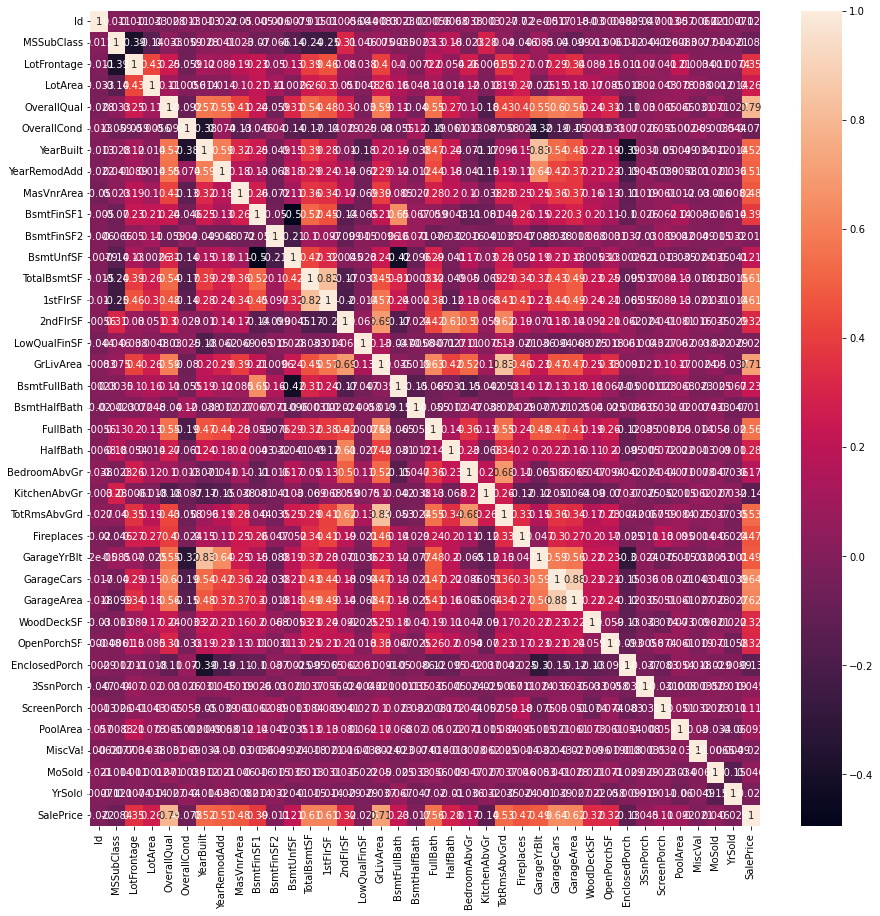

In [13]:
ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);
#A method used to visualize the correlation between columns in a dataframe

### Data Visualization

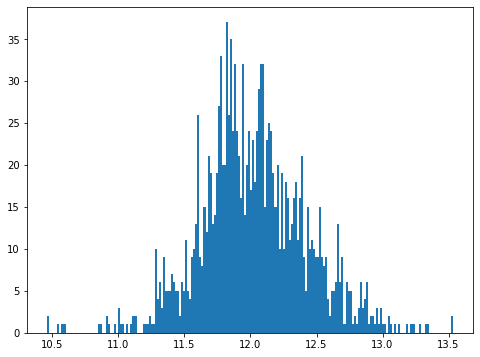

In [14]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df['SalePrice'])), bins=200);

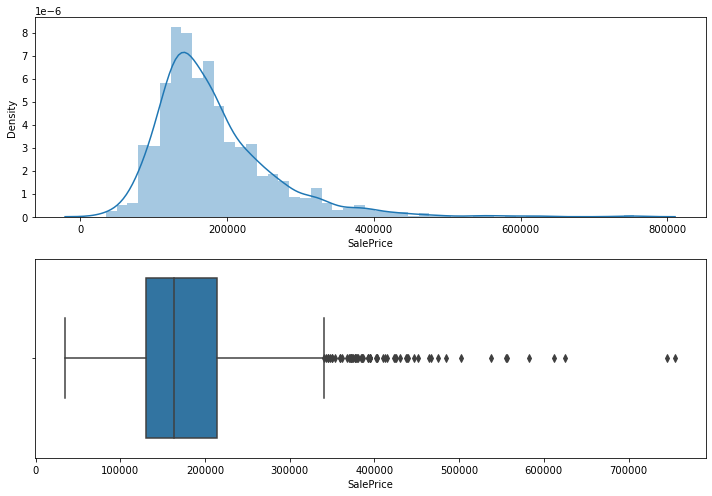

In [15]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['SalePrice'])
fig.add_subplot(2,1,2)
sns.boxplot(df['SalePrice'])
plt.tight_layout();

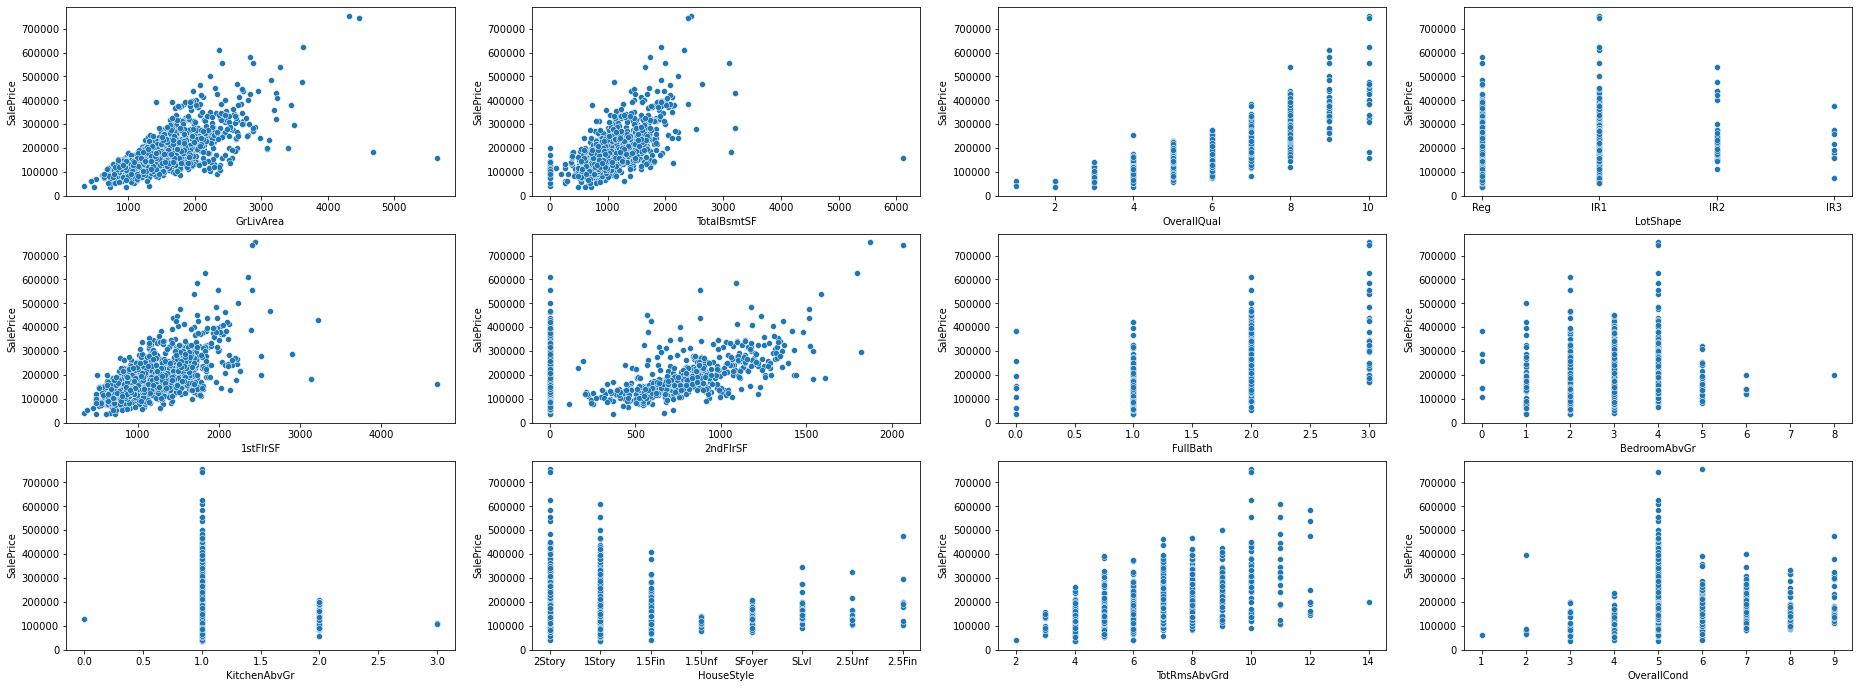

In [16]:
fig = plt.figure(figsize=(32,16))
fig.add_subplot(4,4,1)
sns.scatterplot(df['GrLivArea'], df['SalePrice'])
fig.add_subplot(4,4,2)
sns.scatterplot(df['TotalBsmtSF'],df['SalePrice'])
fig.add_subplot(4,4,3)
sns.scatterplot(df['OverallQual'],df['SalePrice'])
fig.add_subplot(4,4,4)

sns.scatterplot(df['LotShape'],df['SalePrice']);
fig.add_subplot(4,4,5)
sns.scatterplot(df['1stFlrSF'],df['SalePrice']);
fig.add_subplot(4,4,6)
sns.scatterplot(df['2ndFlrSF'],df['SalePrice']);
fig.add_subplot(4,4,7)
sns.scatterplot(df['FullBath'],df['SalePrice']);
fig.add_subplot(4,4,8)
sns.scatterplot(df['BedroomAbvGr'],df['SalePrice']);
fig.add_subplot(4,4,9)
sns.scatterplot(df['KitchenAbvGr'],df['SalePrice']);

fig.add_subplot(4,4,10)
sns.scatterplot(df['HouseStyle'],df['SalePrice']);
fig.add_subplot(4,4,11)
sns.scatterplot(df['TotRmsAbvGrd'],df['SalePrice']);

fig.add_subplot(4,4,12)
sns.scatterplot(df['OverallCond'],df['SalePrice']);



In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

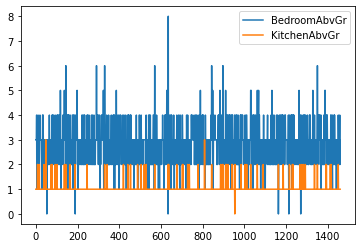

In [18]:
df.BedroomAbvGr.plot(), df.KitchenAbvGr.plot()
plt.legend();

<AxesSubplot:>

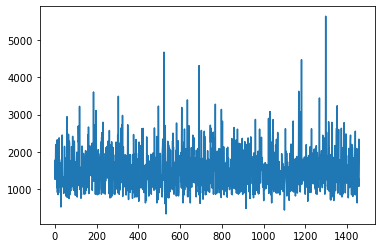

In [19]:
df.GrLivArea.plot()

<AxesSubplot:>

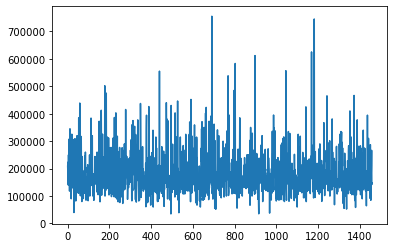

In [20]:
df.SalePrice.plot()

<AxesSubplot:>

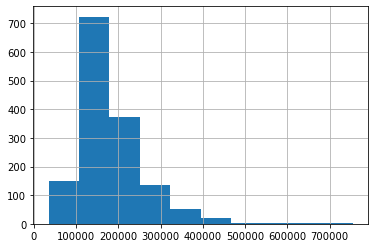

In [21]:
df.SalePrice.hist()

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)  
IQR = Q3 - Q1
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

### Feature Engineering

###### Creating new data by making inferences fromexistinf data.
An example would be calculating the age of a building by subtracting the year it was built from the current year, and adding this information as a new column to the dataset.

In [23]:
df['BedroomAbvGr']=df['BedroomAbvGr']**2 

In [24]:
df['Age']=2022-df['YearBuilt']

In [25]:
import numpy as np
#df['basement']= np.where(df['sqft_basement']>0, 1, 0)
#df['renovated'] = np.where(df['yr_renovated']>0, 1, 0)


In [26]:
df.quantile(.97).astype('int')

Id                 1416
MSSubClass          160
LotFrontage         120
LotArea           21571
OverallQual           9
OverallCond           8
YearBuilt          2007
YearRemodAdd       2008
MasVnrArea          574
BsmtFinSF1         1375
BsmtFinSF2          546
BsmtUnfSF          1589
TotalBsmtSF        1905
1stFlrSF           1981
2ndFlrSF           1245
LowQualFinSF          0
GrLivArea          2633
BsmtFullBath          1
BsmtHalfBath          1
FullBath              2
HalfBath              1
BedroomAbvGr         16
KitchenAbvGr          2
TotRmsAbvGrd         10
Fireplaces            2
GarageYrBlt        2008
GarageCars            3
GarageArea          884
WoodDeckSF          385
OpenPorchSF         213
EnclosedPorch       216
3SsnPorch             0
ScreenPorch         192
PoolArea              0
MiscVal             400
MoSold               12
YrSold             2010
SalePrice        374230
Age                 112
Name: 0.97, dtype: int64

In [27]:
outliers = df.quantile(.97)
df = df[(df['SalePrice']<outliers['SalePrice'])]
df = df[(df['GrLivArea']<outliers['GrLivArea'])]
df = df[(df['TotalBsmtSF']<outliers['TotalBsmtSF'])]
df = df[(df['TotRmsAbvGrd']<outliers['TotRmsAbvGrd'])]
df = df[(df['OverallQual']<outliers['OverallQual'])]
df = df[(df['1stFlrSF']<outliers['1stFlrSF'])]
df = df[(df['2ndFlrSF']<outliers['2ndFlrSF'])]
df = df[(df['BedroomAbvGr']<outliers['BedroomAbvGr'])]
df = df[(df['KitchenAbvGr']<outliers['KitchenAbvGr'])]
df = df[(df['TotRmsAbvGrd']<outliers['TotRmsAbvGrd'])]
df = df[(df['OverallQual']<outliers['OverallQual'])]


In [28]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
count,1121.000000,1121.000000,912.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1116.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.0,1121.000000,1121.000000,1065.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,726.054416,54.326494,66.711623,9637.099019,5.909902,5.617306,1972.015165,1984.859946,80.166667,423.545941,50.095450,533.998216,1007.639607,1091.326494,251.188225,3.392507,1345.907226,0.425513,0.058876,1.455843,0.338983,7.220339,1.0,5.968778,0.545941,1978.461033,1.685995,450.221231,85.290812,42.008029,20.422837,3.624442,14.366637,1.091882,36.256913,6.235504,2007.826048,164238.570919,49.984835
std,420.132570,43.122712,21.350485,7542.078732,1.201153,1.091699,28.520211,20.506989,149.150182,395.044256,166.680621,415.422021,342.084240,311.587388,355.951925,34.771464,365.034634,0.508877,0.239259,0.514143,0.477331,2.611201,0.0,1.185443,0.615197,23.894281,0.681038,194.818540,115.269851,60.905422,56.447127,30.297880,53.026175,25.883384,484.704061,2.705785,1.331983,54569.999045,28.520211
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,13.000000
25%,367.000000,20.000000,55.000000,7200.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,207.000000,784.000000,858.000000,0.000000,0.000000,1060.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,5.000000,0.000000,1961.000000,1.000000,308.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,127500.000000,22.000000
50%,723.000000,50.000000,66.000000,9056.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,385.000000,0.000000,440.000000,970.000000,1048.000000,0.000000,0.000000,1337.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.0,6.000000,0.000000,1979.000000,2.000000,461.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,155000.000000,50.000000
75%,1092.000000,70.000000,79.000000,10839.000000,7.000000,6.000000,2000.000000,2003.000000,120.000000,695.000000,0.000000,768.000000,1240.000000,1309.000000,601.000000,0.000000,1601.000000,1.000000,0.000000,2.000000,1.000000,9.000000,1.0,7.000000,1.000000,2001.000000,2.000000,558.000000,160.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,193000.000000,68.000000
max,1460.000000,190.000000,182.000000,164660.000000,8.000000,9.000000,2009.000000,2010.000000,1600.000000,1619.000000,1127.000000,1836.000000,1902.000000,1902.000000,1208.000000,528.000000,2622.000000,3.000000,2.000000,3.000000,2.000000,9.000000,1.0,9.000000,3.000000,2010.000000,4.000000,1356.000000,736.000000,523.000000,330.000000,508.000000,396.000000,648.000000,15500.000000,12.000000,2010.000000,372402.000000,147.000000


In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
x = df[['GrLivArea','TotalBsmtSF','OverallQual','LotShape','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','KitchenAbvGr','HouseStyle','TotRmsAbvGrd','OverallCond','MSSubClass',
       'Condition1','Condition2','Age','Heating',]]

In [31]:
x.head()

,GrLivArea,TotalBsmtSF,OverallQual,LotShape,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,HouseStyle,TotRmsAbvGrd,OverallCond,MSSubClass,Condition1,Condition2,Age,Heating
0,1710,856,7,Reg,856,854,2,9,1,2Story,8,5,60,Norm,Norm,19,GasA
1,1262,1262,6,Reg,1262,0,2,9,1,1Story,6,8,20,Feedr,Norm,46,GasA
2,1786,920,7,IR1,920,866,2,9,1,2Story,6,5,60,Norm,Norm,21,GasA
3,1717,756,7,IR1,961,756,1,9,1,2Story,7,5,70,Norm,Norm,107,GasA
5,1362,796,5,IR1,796,566,1,1,1,1.5Fin,5,5,50,Norm,Norm,29,GasA


In [32]:
y = df[['SalePrice']]

In [33]:
y.shape

(1121, 1)

In [34]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
5,143000


In [35]:
x=pd.get_dummies(x,drop_first=True)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((896, 35), (225, 35), (896, 1), (225, 1))

In [38]:
x.head()

,GrLivArea,TotalBsmtSF,OverallQual,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,OverallCond,MSSubClass,Age,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_RRNn,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
0,1710,856,7,856,854,2,9,1,8,5,60,19,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,1262,1262,6,1262,0,2,9,1,6,8,20,46,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1786,920,7,920,866,2,9,1,6,5,60,21,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,1717,756,7,961,756,1,9,1,7,5,70,107,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
5,1362,796,5,796,566,1,1,1,5,5,50,29,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [39]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) #The model visits and processes each unit of data

In [40]:
y_pretest = regmodel.predict(x_test) #We predicted house prices in the test data


In [41]:
(mean_squared_error(y_test,y_pretest))**0.5 #we took square with **0.5  

24112.574919821356

In [42]:
r2_score(y_test,y_pretest)

0.7775965624276082

In [43]:
from sklearn.linear_model import Ridge,Lasso

In [44]:
R = Ridge()
R.fit(x_train,y_train)
y_pred_ridge = R.predict(x_test) 

In [45]:
(mean_squared_error(y_test,y_pred_ridge))**0.5 #we took square with **0.5  

23868.509867885252

In [47]:
r2_score(y_test,y_pred_ridge)

0.7820760669011176

In [48]:
#Lasso Regression

In [49]:
L = Lasso()
L.fit(x_train,y_train)
y_pred_lasso = L.predict(x_test)
y_pred_lasso

array([121045.73056958, 136887.6843351 , 190928.46800458, 202307.75590795,
       176208.54441983,  68154.64730993, 161663.44463866, 139307.55785487,
       216786.09282256, 172005.18497009, 211164.21866324, 163821.2992377 ,
       240981.82245782, 155295.53749003, 225408.78771946, 131274.27255439,
       172435.07692628, 209504.33046678, 214383.65655638, 199200.13879974,
       200460.57017472, 184953.11910081, 187457.9881507 , 140486.86141498,
       154546.30439385,  71721.70629645, 124390.13315751, 110627.67884986,
       170338.38640216, 122526.66083695, 226312.0253673 , 162044.81291186,
       152198.83652605, 236312.0204751 , 228231.00373873, 172859.52704889,
        80392.10963315, 138223.62199925, 120852.02573453, 139334.13525926,
       136468.7373584 , 208107.57614624, 238537.28986714, 130828.77745775,
       255041.79668979, 231862.56106536, 129265.35403014, 152711.23586893,
       197753.28427293, 253240.58709911, 136003.82220735, 190165.57817479,
       138875.9759471 , 1

In [50]:
(mean_squared_error(y_test,y_pred_lasso))**0.5 #we took the square with **0.5  

24085.08321571182

In [51]:
r2_score(y_test,y_pred_lasso)

0.7781034153016532

In [52]:
#Elastic Net

In [53]:
from sklearn.linear_model import ElasticNet #Lasso and Ridge are both used.The one with better advantages is preferred.

In [54]:
E = ElasticNet(l1_ratio = .8)

In [55]:
E.fit(x_train,y_train)
y_pred_elastic = E.predict(x_test)

In [56]:
(mean_squared_error(y_test,y_pred_elastic))**0.5 #we took square with **0.5 

23819.224551782158

In [57]:
r2_score(y_test,y_pred_elastic)


0.7829751059432944

In [58]:
# ExtraTreeRegressor
ETR = ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr = ETR.predict(x_test) 

In [59]:
(mean_squared_error(y_test,y_pred_etr))**0.5  

33248.814047087115

In [60]:
r2_score(y_test,y_pred_etr)

0.5771302357347863

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
#GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [63]:
y_pred_gbr = GBR.predict(x_test)

In [64]:
(mean_squared_error(y_test,y_pred_gbr))**0.5  

21966.978853003766

In [65]:
r2_score(y_test,y_pred_gbr)

0.8154156062778499

In [66]:
#K- Neighbors  #It predicts the price based on the other house prices in the location
from sklearn.neighbors import KNeighborsRegressor       
est = KNeighborsRegressor(n_neighbors = 10,weights = 'uniform')
model = est.fit(x_train,y_train)

In [67]:
y_pred_knb = model.predict(x_test)

In [68]:
y_pred_knb.shape

(225, 1)

In [69]:
(mean_squared_error(y_test,y_pred_knb))**0.5  


28417.240118253725

In [70]:
r2_score(y_test,y_pred_knb)


0.6910998569137305

In [71]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [72]:
y_pred_xgb = model.predict(x_test)

In [73]:
(mean_squared_error(y_test,y_pred_xgb))**0.5

23639.0432620286

In [74]:
r2_score(y_test,y_pred_xgb)

0.7862460708870352

In [75]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [76]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.854548,21013.808919,14904.659500
Ridge,0.850876,21277.397056,15723.774436
Linear,0.850768,21285.131918,15761.758909
Lasso,0.850718,21288.693842,15761.453081
ElasticNet,0.840699,21991.460769,15955.641632
XGradientBooting,0.819567,23404.689759,16392.659444
Extra Tree,0.546334,37111.903455,25475.911111


In [77]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

In [78]:
y_test = np.array(list(y_test))
y_pred = np.array(pred)
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()